## Sensing matrix plot

### Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sko.GA import GA
from seaborn import heatmap

### Define functions

In [2]:
m, n, a = 9, 15, 3

def fun(v):
    d1 = mat(v)
    l1 = np.dot(d1.T, d1) - a * np.eye(n)
    l1 = np.sum(l1 ** 2)
    l2 = np.sum(d1, axis = 1)
    l2 = np.sum((l2 - np.mean(l2)) ** 2)
    return l1 + l2


def mat(v):
    d = v.reshape((m,n))
    d1 = np.array([np.argsort(d[:,i]) for i in range(d.shape[1])]).T
    d1[d1 < a] = 1
    d1[d1 >= a] = 0
    return d1  

### Random initialization

([], [])

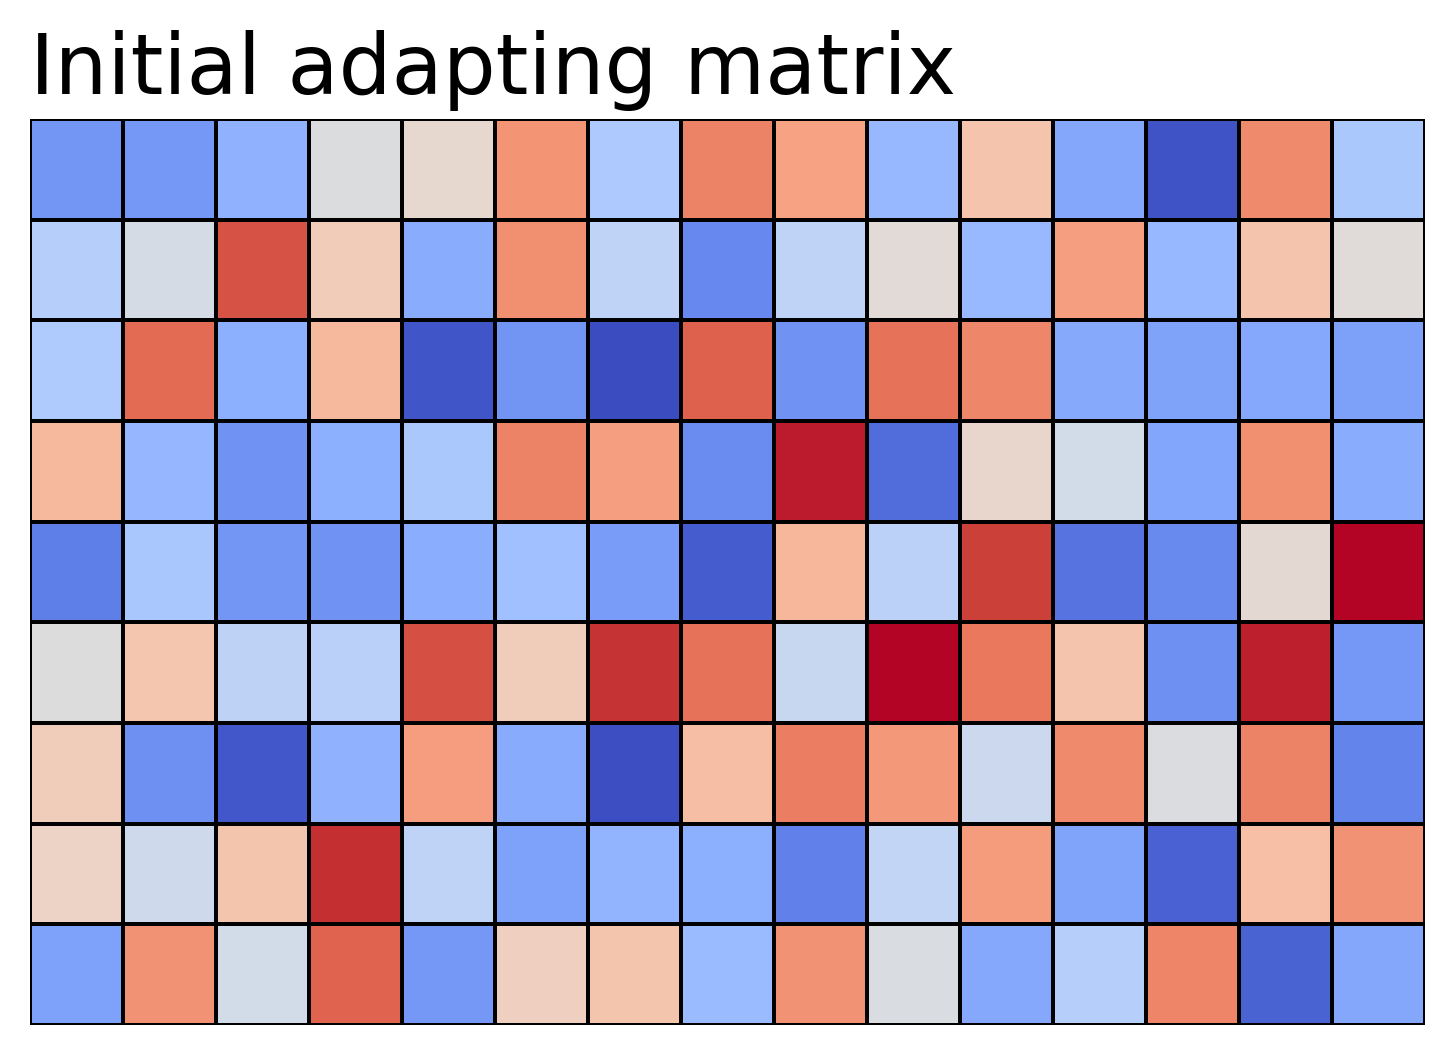

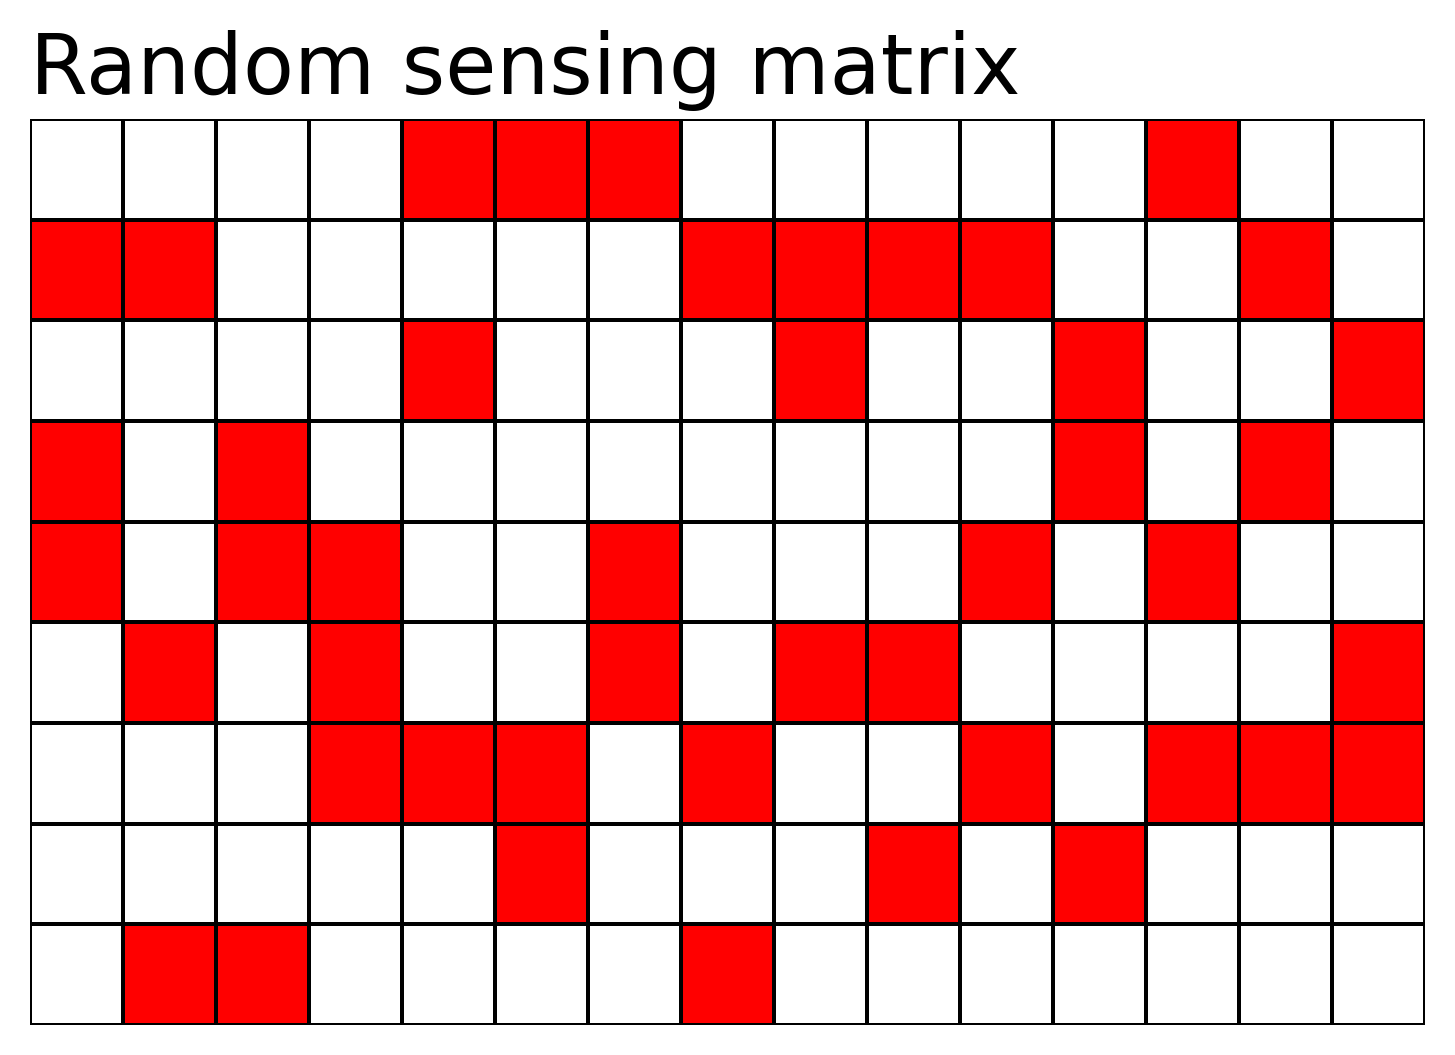

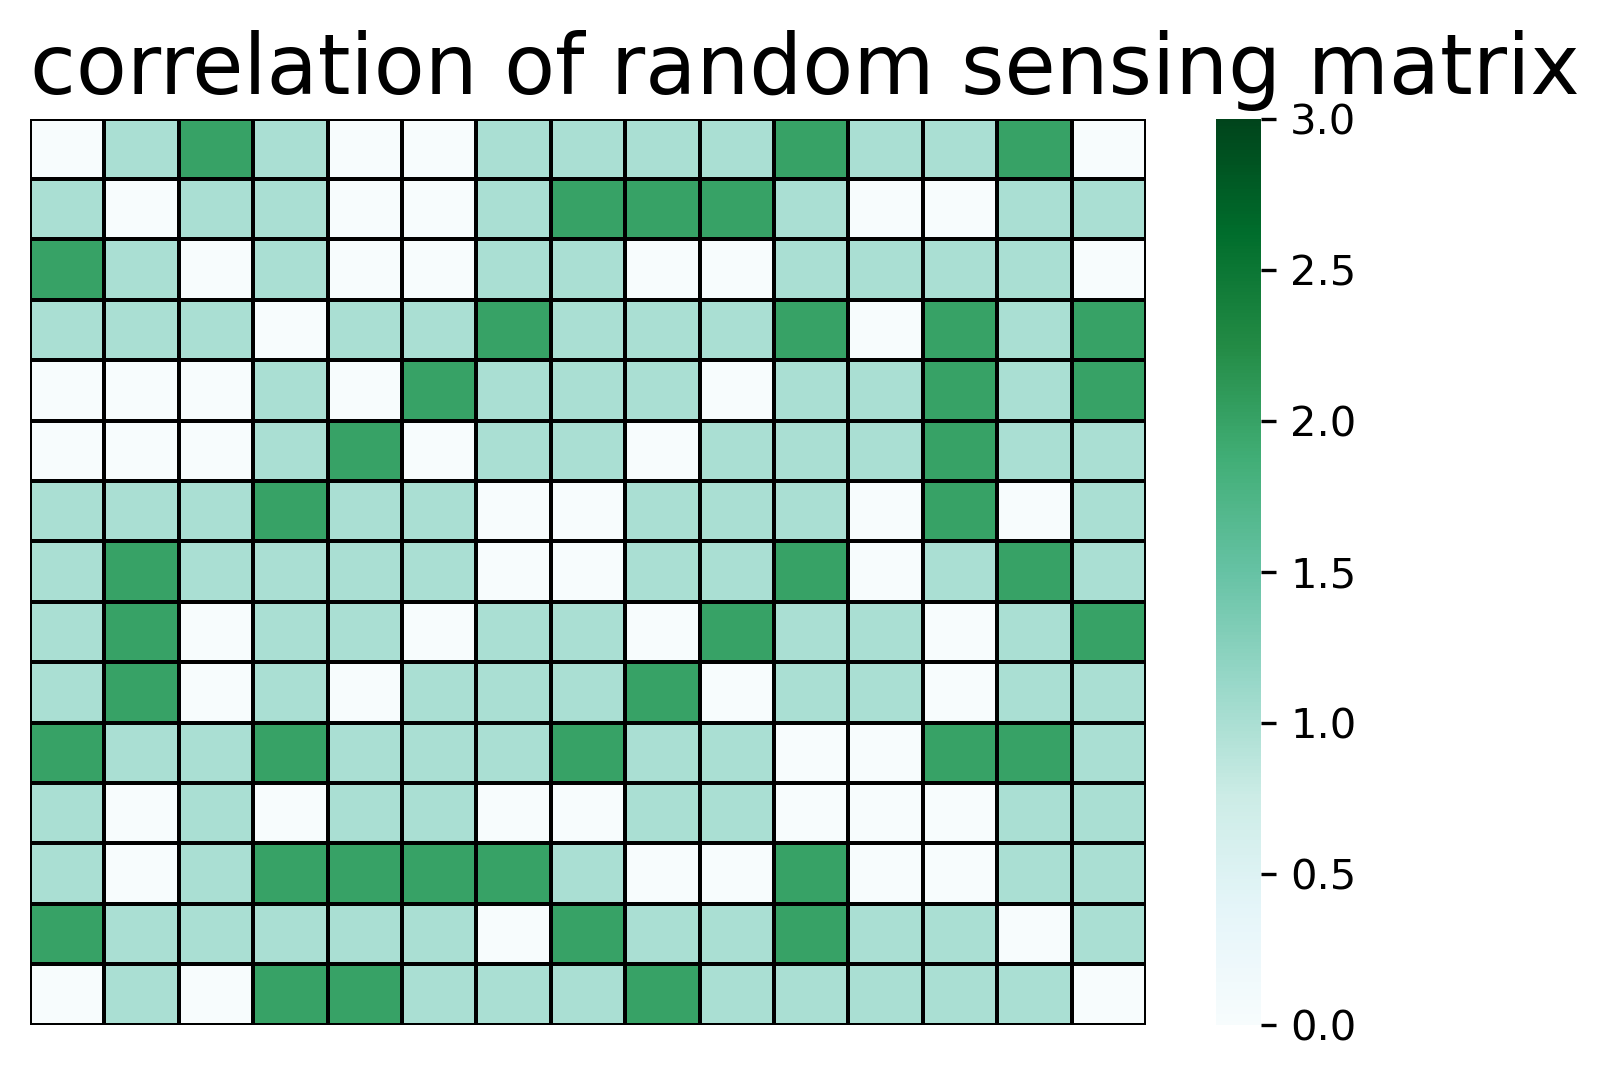

In [3]:
v0 = np.random.random(m * n)
adapting_0 = np.reshape(v0, (m,n))
sensing_0 = mat(v0)
corr_0 = np.dot(sensing_0.T, sensing_0) - a * np.eye(n)

plt.figure(dpi = 300)
heatmap(adapting_0, cbar = False, cmap = 'coolwarm', linewidths = 0.5, linecolor = 'black')
plt.title('Initial adapting matrix', loc='left', fontsize = 20)
plt.xticks([])
plt.yticks([])

plt.figure(dpi = 300)
heatmap(sensing_0, cbar = False, cmap = ['#FFFFFF', '#FF0000'], linewidths = 0.5, linecolor = 'black')
plt.title('Random sensing matrix', loc='left', fontsize = 20)
plt.xticks([])
plt.yticks([])

plt.figure(dpi = 300)
heatmap(corr_0, cbar = True, cmap = 'BuGn', linewidths = 0.5, linecolor = 'black', vmin = 0, vmax = 3)
plt.title('correlation of random sensing matrix', loc='left', fontsize = 20)
plt.xticks([])
plt.yticks([])

### Optimize with GA

([], [])

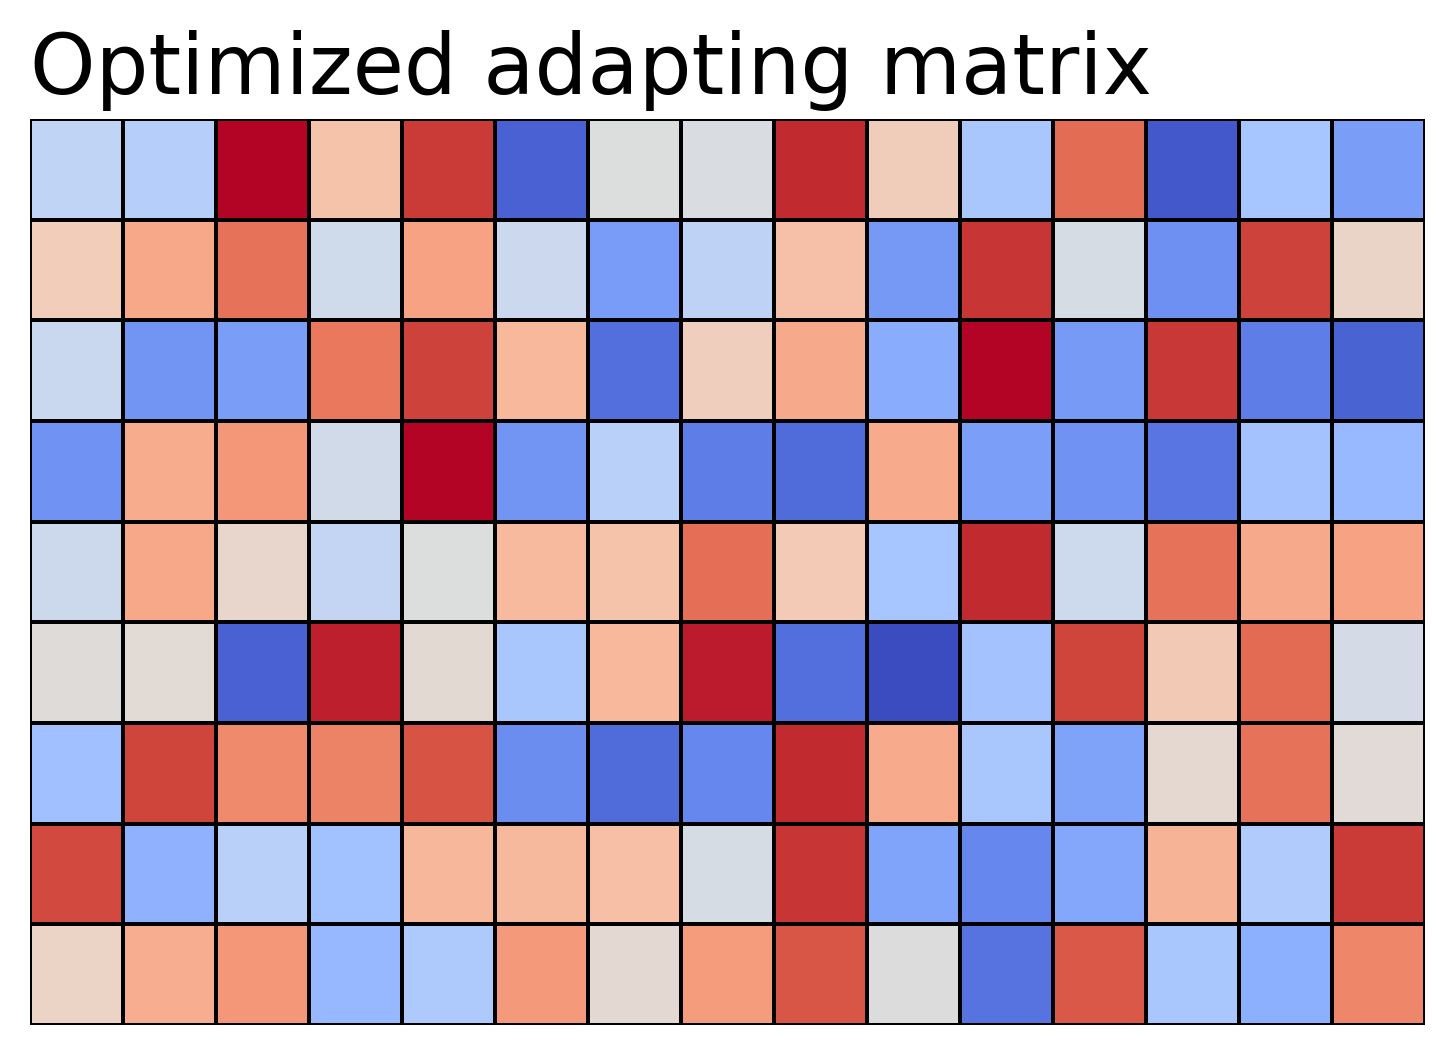

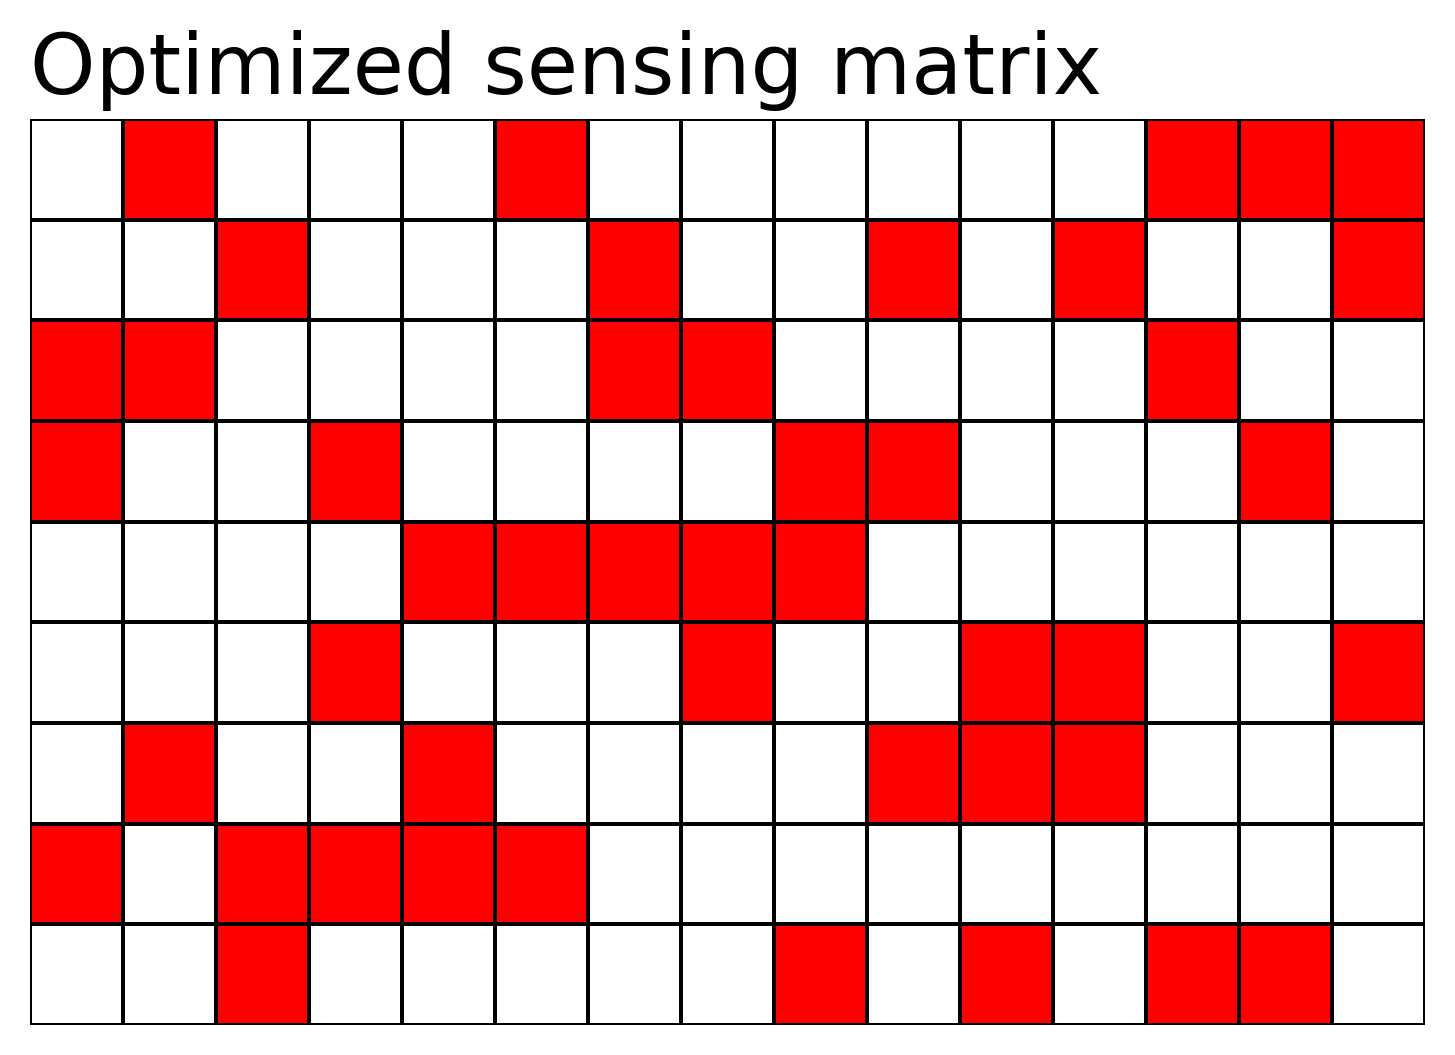

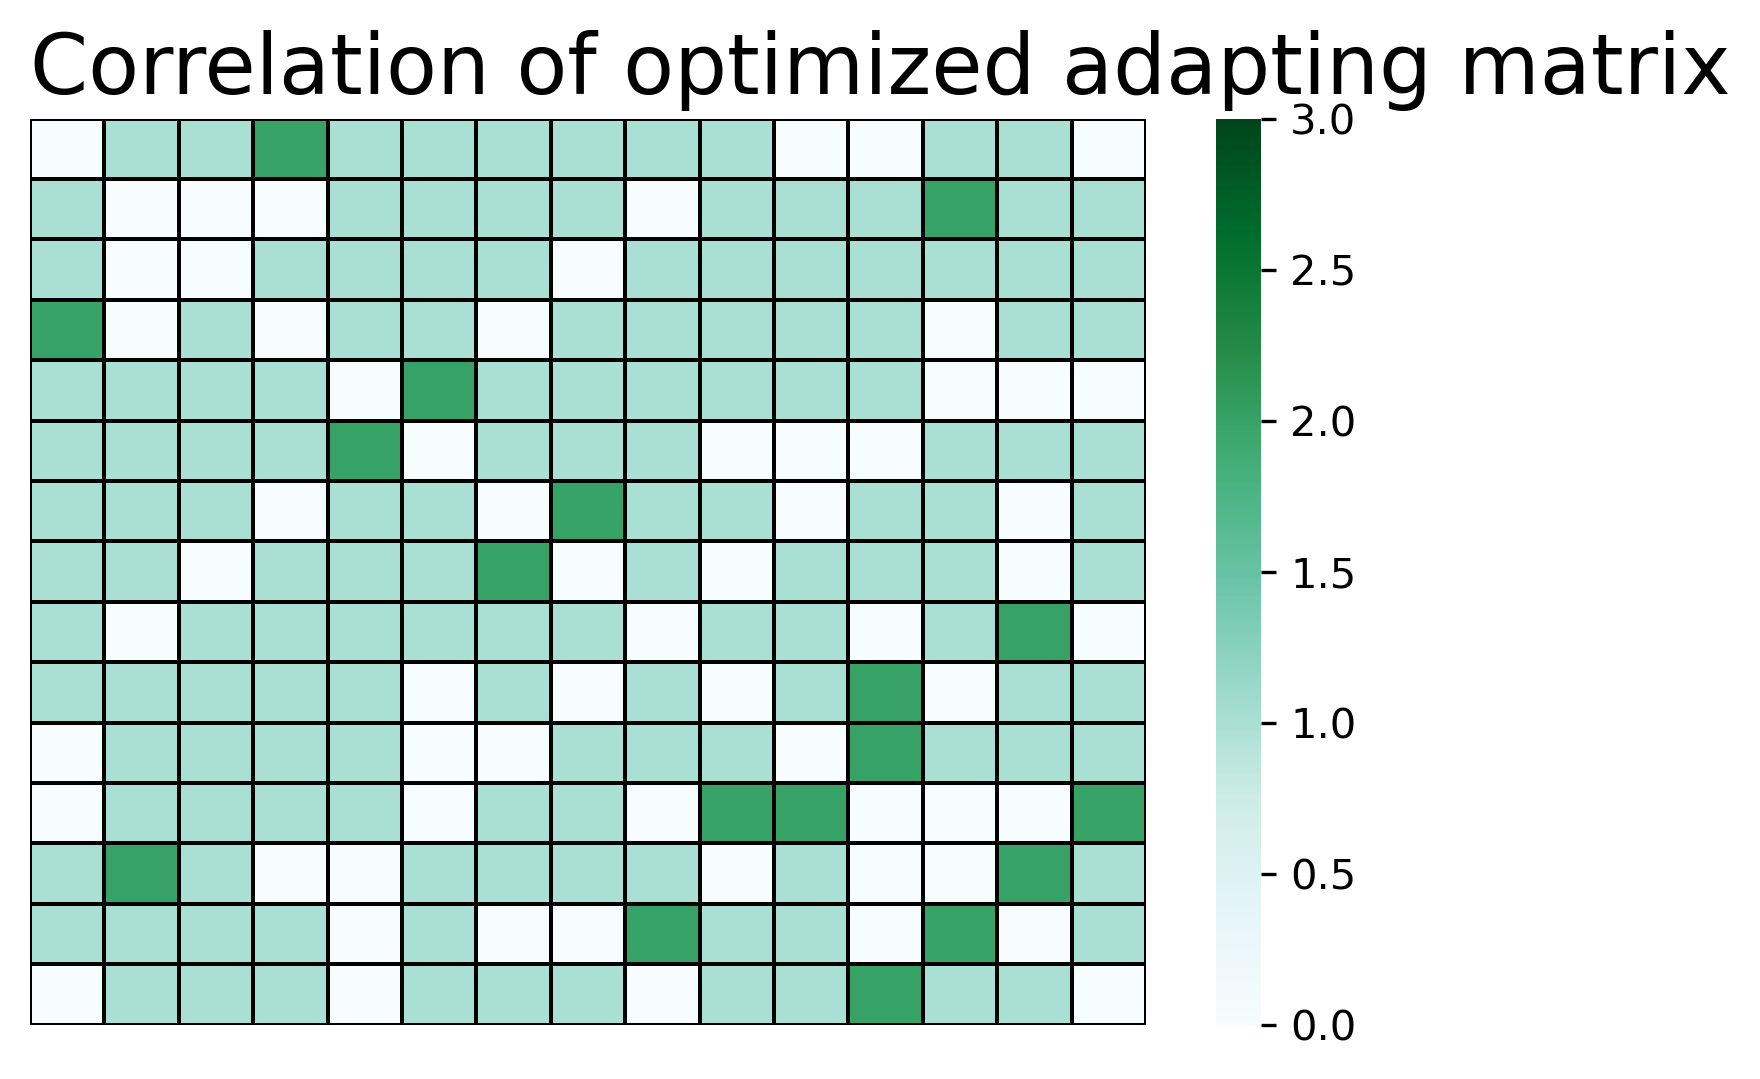

In [4]:
# Note: Since GA algorithm has randomness, the generated matrix may be different from the matrix used in the manuscript.

ga = GA(func = fun, n_dim = m*n, max_iter = 500, lb = np.repeat(0, m*n), ub = np.repeat(1, m*n))
x, y = ga.run()

adapting = np.reshape(x, (m,n))
sensing = mat(x)
corr = np.dot(sensing.T, sensing) - a * np.eye(n)

plt.figure(dpi = 300)
heatmap(adapting, cbar = False, cmap = 'coolwarm', linewidths = 0.5, linecolor = 'black')
plt.title('Optimized adapting matrix', loc='left', fontsize = 20)
plt.xticks([])
plt.yticks([])

plt.figure(dpi = 300)
heatmap(sensing, cbar = False, cmap = ['#FFFFFF', '#FF0000'], linewidths = 0.5, linecolor = 'black')
plt.title('Optimized sensing matrix', loc='left', fontsize = 20)
plt.xticks([])
plt.yticks([])

plt.figure(dpi = 300)
heatmap(corr, cbar = True, cmap = 'BuGn', linewidths = 0.5, linecolor = 'black', vmin = 0, vmax = 3)
plt.title('Correlation of optimized adapting matrix', loc='left', fontsize = 20)
plt.xticks([])
plt.yticks([])

### Test suitable number

In [5]:
from tqdm import tqdm
from core.core import *

n_pools, n_replicates = 9, 3

max_rep = []

for n_drugs in tqdm(np.arange(5, 29, 2)):
    max_r = []
    for i in range(50):
        pool_matrix = generate_sensing_matrix(n_pools = n_pools, n_drugs = n_drugs, n_replicates = n_replicates, plot_his = False)
        corr = np.dot(pool_matrix.T, pool_matrix) - n_replicates * np.eye(n_drugs)
        max_r.append(np.mean(corr))
    max_rep.append(max_r)

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [50:20<00:00, 251.74s/it]


Text(0, 0.5, 'max overlapped pools')

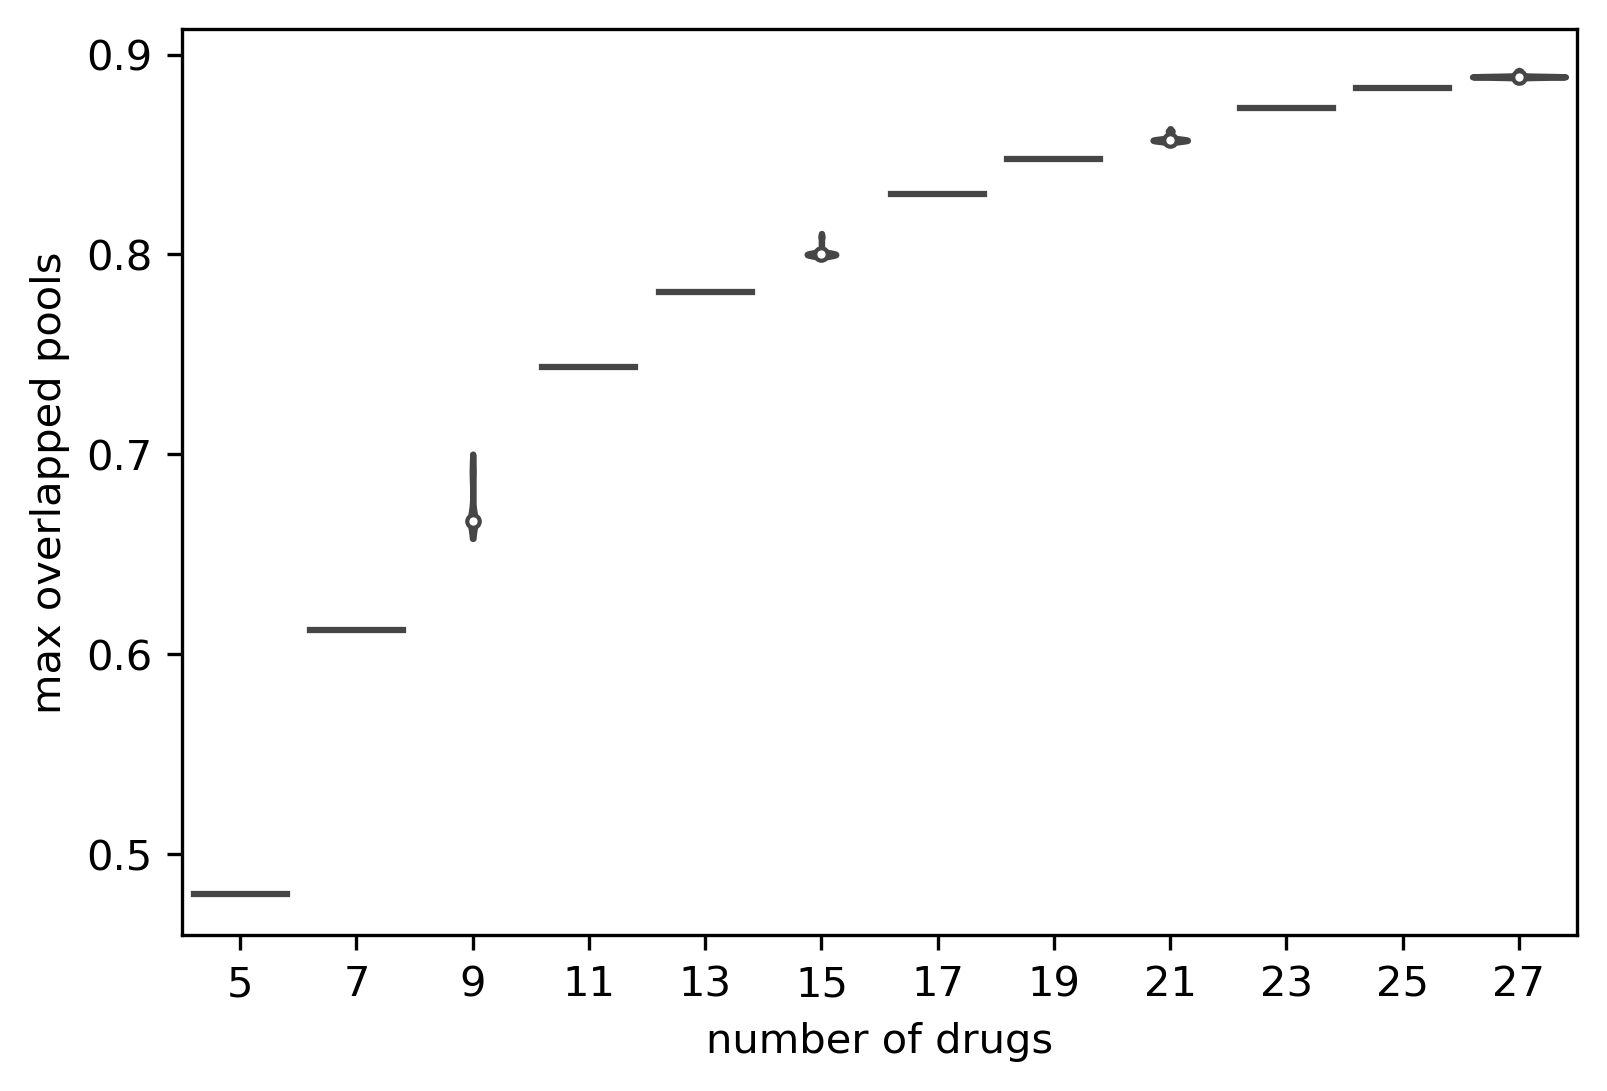

In [7]:
max_rep = np.array(max_rep).T
max_num = np.mean(max_rep, axis = 1)

x = np.array(np.repeat(np.arange(5,29,2), 50))
y = max_rep.reshape((len(x),))

plt.figure(dpi = 300)
sns.violinplot(x = x, y = y)
plt.xlabel('number of drugs')
plt.ylabel('max overlapped pools')